In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import ULDM, MSW


import os
import sys
# Get the current working directory
peanuts_path = os.path.abspath(os.path.join(os.getcwd(), "external", "PEANUTS"))

# Add PEANUTS to the Python path
sys.path.append(peanuts_path)

from peanuts.time_average import NadirExposure

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 1., 
        'mu3'  : 0.  ,
        'mdm'  : 1. , 
        'alpha': 0.  ,
        'eps' : 0.  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }



annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

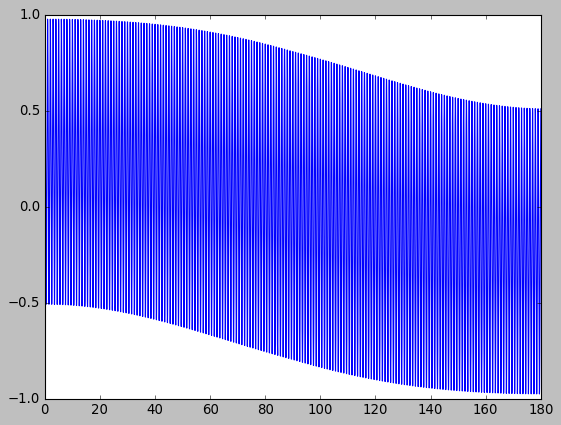

In [18]:
lat = 36

time_day = np.linspace(0, 180, 180*24)


cos_lat = np.cos(np.radians(lat))
sin_lat = np.sin(np.radians(lat))

sin_deltas = -np.sin(0.4091) * np.cos(2 * np.pi * time_day/365.25)
cos_deltas = np.sqrt(1 - sin_deltas**2)

cos_eta = cos_lat * cos_deltas * np.cos(2 * np.pi * time_day ) - sin_lat * sin_deltas


plt.plot(time_day, cos_eta)

In [20]:
frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

predicted_total_signal = frame_predicted_total_signal.__getitem__(param, name="MSW") 

print(np.mean(predicted_total_signal))



0.43711383384589986


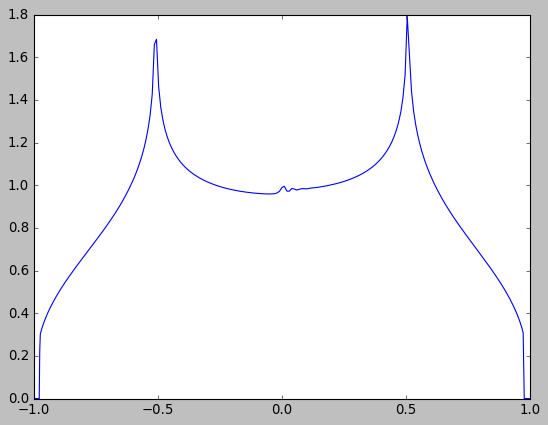

In [ ]:


# Compute nadir exposure for various latitude values
lat = 36
exposure = NadirExposure(lam=np.radians(lat), d1=0, d2=365, normalized=True, ns=480)

intero_exposure = np.interp(frame_predicted_total_signal.eta, exposure[:,0], exposure[:,1] )

bins = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0., 0.16, 0.32, 0.48, 0.64, 0.8, 1])
flux = np.zeros((2,11))
for i in range (11):
    flux[0,i] = 0.5 * (bins[i] + bins[i+1])
    cond = (np.cos(frame_predicted_total_signal.eta) < bins[i+1]) & np.cos(frame_predicted_total_signal.eta) >= bins[i]
    flux[1,i] = np.mean(np.mean(predicted_total_signal[:,:,0],axis=0)[cond])


plt.plot(np.cos(frame_predicted_total_signal.eta), intero_exposure * 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal[:,:,0],axis=0))


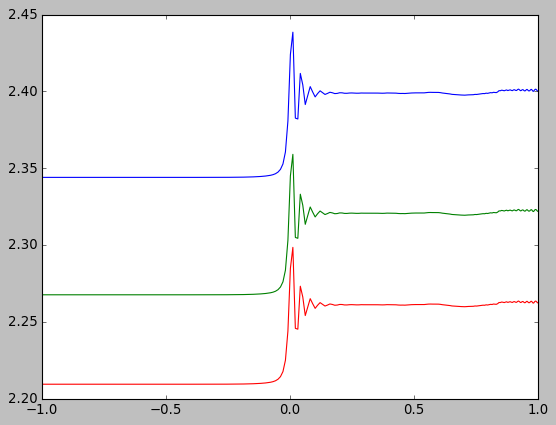

In [21]:
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[0,:,0], 'b-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[80,:,0], 'r-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal[:,:,0],axis=0), 'g-')

In [30]:
print(1e4 * frame_predicted_total_signal.SNO_norm * np.trapz(predicted_total_signal[0,:,0], frame_predicted_total_signal.eta)/(3.14))




2.372206014867242


In [31]:
print(frame_predicted_total_signal.eta, 2 * np.pi)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 